it is applicable to the lot of scenarios
- robust to outliers
- also work with non linear

In SVM we want to find the equation of the hyperplane for which the margin (d), which is basically the distance between the +ve hyperplane and -ve hyperplane is maximum. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

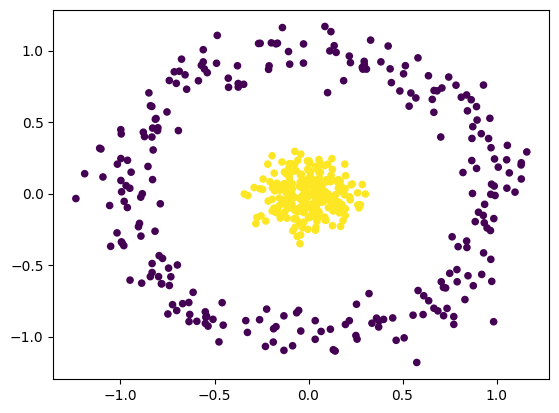

In [2]:
from sklearn.datasets._samples_generator import make_circles
x, y = make_circles(500, factor=.1, noise=.1)


plt.scatter(x[:, 0], x[:, 1], c=y, s=20)

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape

((400, 2), (400,))

In [4]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

score = []
models = []
for i in kernel:
    svc = SVC(kernel=i)
    models.append(svc.fit(x_train, y_train))
    y_pred = svc.predict(x_test)
    score.append(accuracy_score(y_true=y_test, y_pred=y_pred))

In [6]:
score

[0.47, 0.65, 1.0, 0.78]

In [7]:
from matplotlib.colors import ListedColormap

zero_one_colormap = ListedColormap(('green', 'orange'))

def plot_decision_boundary(x, y, classifier):
    x_set, y_set = x, y
    x1, x2 = np.meshgrid(
        np.arange(
            start= x_set[:, 0].min() - 1, 
            stop = x_set[:, 0].max() + 1, 
            step = 0.01
            ),
        np.arange(
            start= x_set[:, 1].min() - 1, 
            stop = x_set[:, 1].max() + 1, 
            step = 0.01)
        )
  
    plt.contourf(
            x1, x2, 
            classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, 
            cmap = zero_one_colormap
        )
    
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            x_set[y_set == j, 0], 
            x_set[y_set == j, 1],
            c = (zero_one_colormap)(i), 
            label = j
        )
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

In [8]:
# linear = plot_decision_boundary(x_test, y_test, classifier=models[0], kernel=kernel[0])
# ploy = plot_decision_boundary(x_test, y_test, models[1], kernel=kernel[1])
# rbf = plot_decision_boundary(x_test, y_test, models[2], kernel=kernel[2])
# sigmoid = plot_decision_boundary(x_test, y_test, models[3], kernel=kernel[3])


/tmp/ipykernel_163131/54425820.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/tmp/ipykernel_163131/54425820.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/tmp/ipykernel_163131/54425820.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the

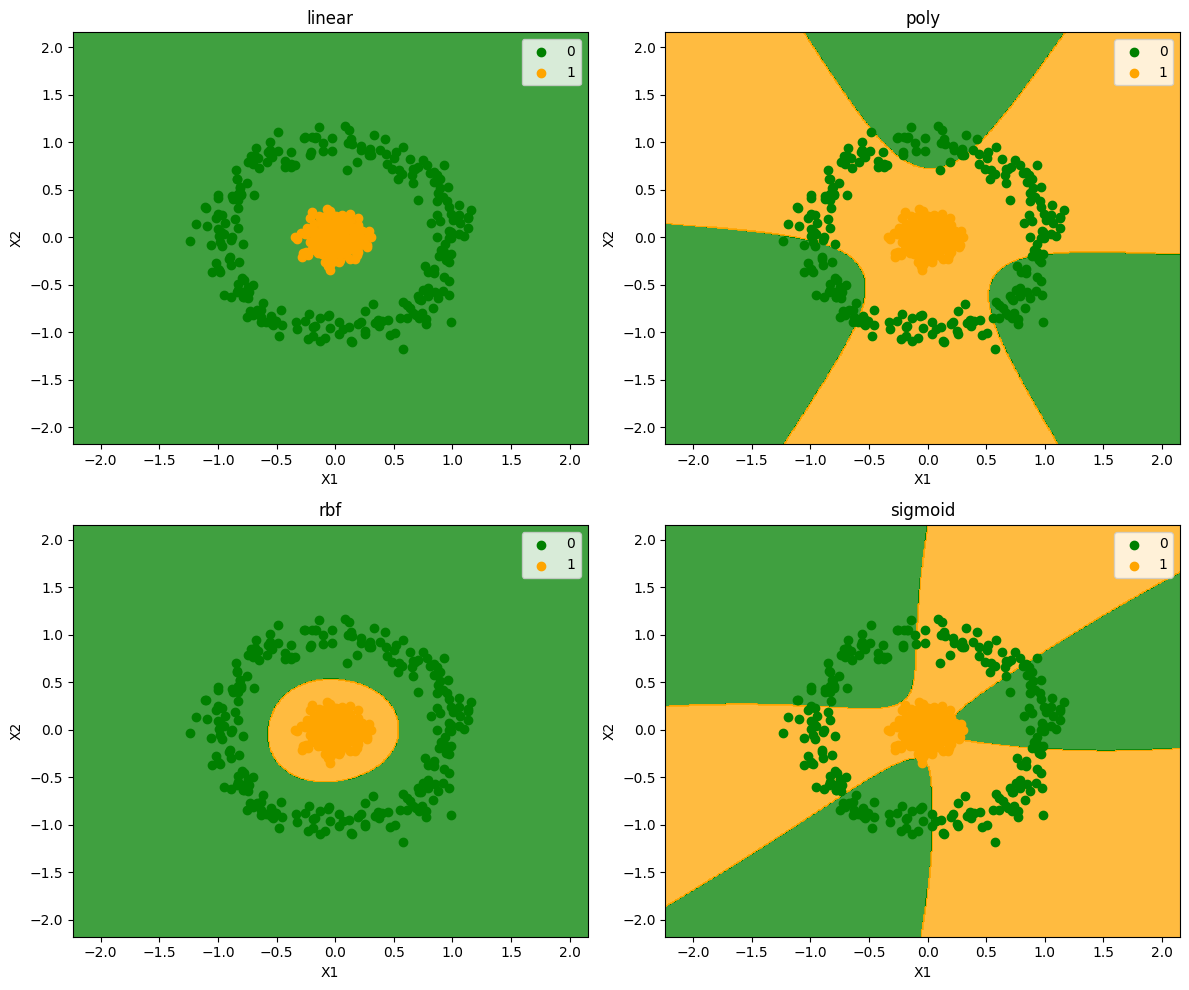

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over classifiers and plot each
for i, (classifier, title) in enumerate(zip(models, kernel)):
    plt.sca(axes[i])
    plot_decision_boundary(x, y, classifier)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()